In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### REading dataset

In [3]:
data=pd.read_csv('/content/data.csv',error_bad_lines=False)
data.head()

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data['strength'].unique()

array([1, 2, 0])

#### code to check all the missing values in my dataset

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

password    0
strength    0
dtype: int64

<Axes: ylabel='count'>

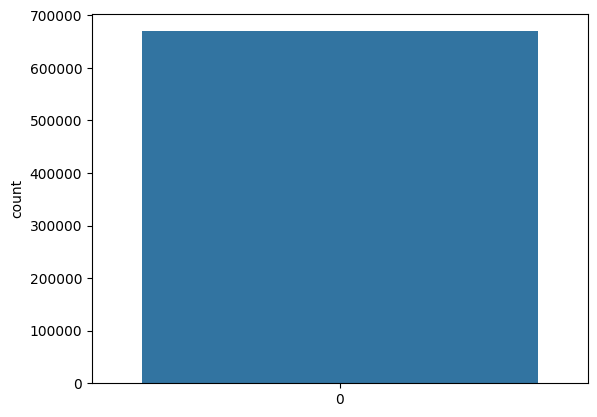

In [8]:
sns.countplot(data['strength'])

In [9]:
password_tuple=np.array(data)

In [11]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### shuffling randomly for robustness

In [12]:
import random
random.shuffle(password_tuple)

In [13]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [14]:
x

['kzde5577',
 'kino3434',
 'kino3434',
 'kzde5577',
 'lamborghin1',
 'kzde5577',
 'lamborghin1',
 'AVYq1lDE4MgAZfNt',
 'kino3434',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'jytifok873',
 'WUt9IZzE0OQ7PkNE',
 'asv5o9yu',
 'kino3434',
 'WUt9IZzE0OQ7PkNE',
 'u6c8vhow',
 'megzy123',
 'AVYq1lDE4MgAZfNt',
 'WUt9IZzE0OQ7PkNE',
 'universe2908',
 'v1118714',
 'megzy123',
 'faranumar91',
 'jytifok873',
 'czuodhj972',
 'universe2908',
 'schalke04',
 'jerusalem393',
 'WUt9IZzE0OQ7PkNE',
 'g067057895',
 'WUt9IZzE0OQ7PkNE',
 'czuodhj972',
 'prisonbreak1',
 'fk9qi21m',
 'u6c8vhow',
 '612035180tok',
 'asv5o9yu',
 '0169395484a',
 'as326159',
 'u6c8vhow',
 'sbl571017',
 'memjan123',
 'yqugu927',
 'sbl571017',
 'hpqkoxsn5',
 '612035180tok',
 'megzy123',
 'prisonbreak1',
 'trabajonet9',
 'tamanagung6',
 'visi7k1yr',
 'klara-tershina3H',
 'yitbos77',
 'v1118714',
 '52558000aaa',
 'fk9qi21m',
 'juliel009',
 'kswa2mrv',
 'go7kew7a2po',
 'jerusalem393',
 'alimagik1',
 'yqugu927',
 'calcifer32',
 'WUt9

#### create a custom function to split input into characters of list

In [15]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [16]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### apply TF-IDF vectorizer on data

In [19]:
X=vectorizer.fit_transform(x)

In [20]:
X.shape

(669639, 130)

In [22]:
vectorizer.get_feature_names_out()

array(['\x01', '\x05', '\x06', '\x0f', '\x10', '\x11', '\x16', '\x17',
       '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x81', '\x8d', '\xa0', '¡',
       '¦', '¨', '«', '¯', '°', '±', '²', '³', '´', 'µ', '·', 'º', '¼',
       '¾', '¿', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'è', 'é', 'ê', 'î',
       'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü',
       'ý', 'þ', 'ÿ', 'œ', '—', '‚', '…', '‹', '›'], dtype=object)

In [23]:
first_document_vector=X[0]
first_document_vector

<1x130 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [24]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56760937],
        [0.        ],
        [0.59149619],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [26]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591496
5,0.567609
z,0.335163
k,0.291996
d,0.285345
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(535711, 130)

In [30]:
from sklearn.linear_model import LogisticRegression

#### Apply Logistic on data as use-cas is Classification

In [31]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [32]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

#### doing prediction for specific custom data

In [33]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

#### doing prediction on X-Test data

In [34]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

#### checking Accuracy of model using confusion_matrix,accuracy_score

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5311 12866    17]
 [ 3666 92764  2608]
 [   52  5117 11527]]
0.8183650916910579


##### creating report of model

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39     18194
           1       0.84      0.94      0.88     99038
           2       0.81      0.69      0.75     16696

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

